# **Tokens, text cleaning and frequency based vectorisation methods for text classification**

Step 1: Perform EDA
Load the Dataset

In [39]:
import pandas as pd

# Load the dataset
df = pd.read_csv("/content/spam.csv",encoding="latin1")

# Display the first few rows of the dataframe
df.head()


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [41]:
df=df[['v1','v2']]
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [42]:
df.describe()

,v1,v2
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [44]:
df.isnull().sum()

v1    0
v2    0
dtype: int64

In [45]:
df=df[['v1','v2']]
df.columns = ['label','text']
df.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."




*   Clean and Preprocess the Text Data by Removing Stopwords



In [46]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter

# Download stopwords
nltk.download('stopwords')
nltk.download('punkt')

# Set of English stopwords
stop_words = set(stopwords.words('english'))

# Function to preprocess text
def preprocess_text(text):
    # Ensure the input is a string
    if not isinstance(text, str):
        text = str(text)
    # Tokenize the text
    tokens = word_tokenize(text)
    # Convert to lowercase and remove stopwords
    filtered_tokens = [token.lower() for token in tokens if token.lower() not in stop_words and token.isalpha()]
    return filtered_tokens

# Apply preprocessing to the text column
df['processed_text'] = df['text'].apply(preprocess_text)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [47]:
# Convert processed text back to strings
df['processed_text_str'] = df['processed_text'].apply(lambda x: ' '.join(x) if x else '')

# Filter out empty strings
df = df[df['processed_text_str'].str.strip() != '']

In [48]:
# Separate spam and ham messages
spam_texts = df[df['label'] == 'spam']['processed_text_str']
ham_texts = df[df['label'] == 'ham']['processed_text_str']


In [49]:
# Separate spam and ham messages
spam_texts = df[df['label'] == 'spam']['processed_text_str']
ham_texts = df[df['label'] == 'ham']['processed_text_str']




*   Find the 10 most frequent words for each class (remove stopwords first)



In [50]:
from sklearn.feature_extraction.text import CountVectorizer

# Function to get the most common n-grams
def get_most_common_ngrams(texts, n=1, top_k=10):
    if texts.empty:
        return []

    vectorizer = CountVectorizer(ngram_range=(n, n))
    ngrams = vectorizer.fit_transform(texts)
    ngram_counts = ngrams.sum(axis=0).A1
    ngram_freq = Counter(dict(zip(vectorizer.get_feature_names_out(), ngram_counts)))
    return ngram_freq.most_common(top_k)

# Ensure texts are non-empty
if not spam_texts.empty:
    spam_most_common_words = get_most_common_ngrams(spam_texts, n=1)
else:
    spam_most_common_words = []

if not ham_texts.empty:
    ham_most_common_words = get_most_common_ngrams(ham_texts, n=1)
else:
    ham_most_common_words = []

spam_most_common_words, ham_most_common_words


([('call', 346),
  ('free', 219),
  ('txt', 156),
  ('ur', 144),
  ('mobile', 123),
  ('text', 121),
  ('stop', 114),
  ('claim', 113),
  ('reply', 104),
  ('prize', 92)],
 [('gt', 318),
  ('lt', 316),
  ('get', 301),
  ('ok', 261),
  ('go', 248),
  ('got', 242),
  ('ur', 237),
  ('know', 236),
  ('like', 231),
  ('call', 230)])



*   Find the 10 most frequent bi-rgams each class  (remove stopwords first)



In [51]:
# Most frequent bigrams
if not spam_texts.empty:
    spam_most_common_bigrams = get_most_common_ngrams(spam_texts, n=2)
else:
    spam_most_common_bigrams = []

if not ham_texts.empty:
    ham_most_common_bigrams = get_most_common_ngrams(ham_texts, n=2)
else:
    ham_most_common_bigrams = []

spam_most_common_bigrams, ham_most_common_bigrams


([('please call', 45),
  ('po box', 24),
  ('guaranteed call', 23),
  ('call landline', 22),
  ('prize guaranteed', 22),
  ('await collection', 19),
  ('every week', 19),
  ('selected receive', 19),
  ('send stop', 19),
  ('call claim', 18)],
 [('lt gt', 276),
  ('gon na', 58),
  ('call later', 50),
  ('let know', 40),
  ('sorry call', 38),
  ('good morning', 31),
  ('take care', 31),
  ('wan na', 28),
  ('decimal gt', 23),
  ('lt decimal', 23)])



*   Find the 10 most frequent tri-rgams each class  (remove stopwords first)



In [52]:
# Most frequent trigrams
if not spam_texts.empty:
    spam_most_common_trigrams = get_most_common_ngrams(spam_texts, n=3)
else:
    spam_most_common_trigrams = []

if not ham_texts.empty:
    ham_most_common_trigrams = get_most_common_ngrams(ham_texts, n=3)
else:
    ham_most_common_trigrams = []

spam_most_common_trigrams, ham_most_common_trigrams


([('prize guaranteed call', 21),
  ('call land line', 18),
  ('private account statement', 16),
  ('call identifier code', 15),
  ('guaranteed call land', 15),
  ('draw shows prize', 14),
  ('identifier code expires', 14),
  ('land line claim', 14),
  ('shows prize guaranteed', 14),
  ('account statement shows', 13)],
 [('sorry call later', 38),
  ('lt decimal gt', 23),
  ('gt lt gt', 18),
  ('happy new year', 18),
  ('lt gt lt', 16),
  ('like lt gt', 14),
  ('pls send message', 13),
  ('cant pick phone', 12),
  ('phone right pls', 12),
  ('pick phone right', 12)])



*   Create wordcloud each class (remove stopwords first)



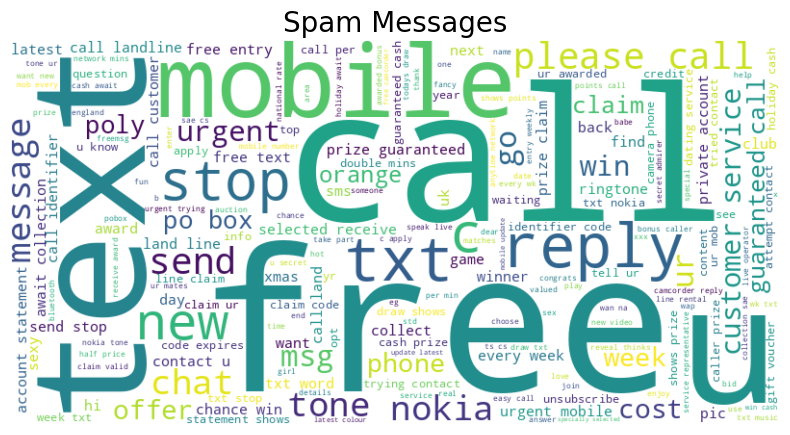

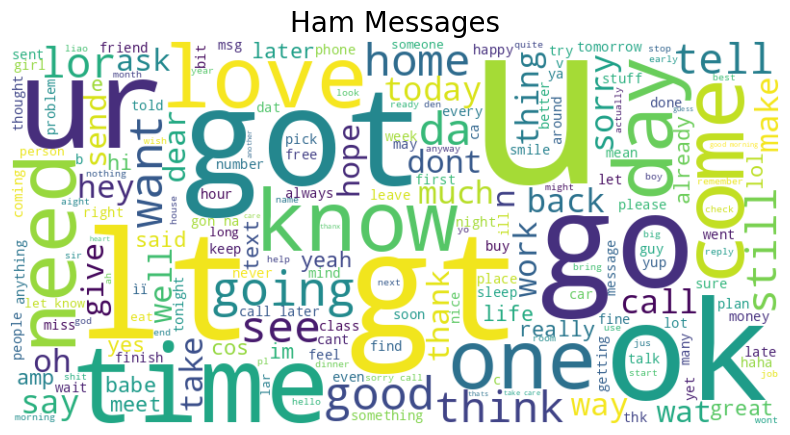

In [53]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Function to create a word cloud
def create_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title, fontsize=20)
    plt.axis('off')
    plt.show()

# Create word clouds for spam and ham messages
spam_text = ' '.join(spam_texts)
ham_text = ' '.join(ham_texts)

if spam_text.strip():
    create_wordcloud(spam_text, 'Spam Messages')

if ham_text.strip():
    create_wordcloud(ham_text, 'Ham Messages')


Step 2: Convert Text to Vectors using Bag-of-Words

In [54]:
from sklearn.feature_extraction.text import CountVectorizer

# Combine spam and ham texts into a single dataset for vectorization
texts = df['processed_text_str']

# Initialize CountVectorizer
vectorizer = CountVectorizer()

# Fit and transform the text data into Bag-of-Words vectors
X = vectorizer.fit_transform(texts)

# Display the shape of the resulting Bag-of-Words matrix
print(f"Shape of the Bag-of-Words matrix: {X.shape}")

# Separate the labels
y = df['label']


Shape of the Bag-of-Words matrix: (5559, 7138)


Step 3: Apply any machine learning model and record the F1-score.

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import f1_score, classification_report

# Convert Text to Vectors using Bag-of-Words
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['processed_text_str'])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, df['label'], test_size=0.2, random_state=42)

# Initialize the Naive Bayes classifier
model = MultinomialNB()

# Train the classifier
model.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = model.predict(X_test)

# Calculate the F1-score
f1 = f1_score(y_test, y_pred, average='weighted')  # Change average to 'weighted'

# Print the classification report
print("Bag-of-Words Model")
print(classification_report(y_test, y_pred))
print(f"F1-score: {f1}")


Bag-of-Words Model
              precision    recall  f1-score   support

         ham       0.99      0.98      0.99       970
        spam       0.87      0.94      0.91       142

    accuracy                           0.97      1112
   macro avg       0.93      0.96      0.95      1112
weighted avg       0.98      0.97      0.98      1112

F1-score: 0.9752521858256358


Step 4: Repeat [2] and [3] but now with Tf-IDF vectors.

In [56]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Convert Text to Vectors using TF-IDF
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(df['processed_text_str'])

# Split the dataset into training and testing sets
X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(X_tfidf, df['label'], test_size=0.2, random_state=42)

# Initialize the Naive Bayes classifier
model_tfidf = MultinomialNB()

# Train the classifier
model_tfidf.fit(X_train_tfidf, y_train_tfidf)

# Predict the labels for the test set
y_pred_tfidf = model_tfidf.predict(X_test_tfidf)

# Calculate the F1-score
f1_tfidf = f1_score(y_test_tfidf, y_pred_tfidf, average='weighted')  # Change average to 'weighted'

# Print the classification report
print("TF-IDF Model")
print(classification_report(y_test_tfidf, y_pred_tfidf))
print(f"F1-score with TF-IDF: {f1_tfidf}")


TF-IDF Model
              precision    recall  f1-score   support

         ham       0.96      1.00      0.98       970
        spam       1.00      0.75      0.85       142

    accuracy                           0.97      1112
   macro avg       0.98      0.87      0.92      1112
weighted avg       0.97      0.97      0.97      1112

F1-score with TF-IDF: 0.9655710719396274


Step 5: Add `text preprocessing` steps and repeat [3] with Tf-IDF vectors. Preprocessing steps to be used:

    - tokenize the text
    - convert to lower case
    - remove stop words
    - remove email-ids, urls and html tags if any
    - remove numbers
    - remove punctuation marks
    - apply Lemmatization to each token

In [57]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import f1_score, classification_report

# Download necessary NLTK data
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

# Initialize the lemmatizer
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Function to preprocess text
def preprocess_text(text):
    # Ensure the input is a string
    if not isinstance(text, str):
        text = str(text)
    # Remove email addresses
    text = re.sub(r'\S+@\S+', '', text)
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    # Remove punctuation marks
    text = re.sub(r'[^\w\s]', '', text)
    # Tokenize the text
    tokens = word_tokenize(text)
    # Convert to lowercase and remove stopwords
    filtered_tokens = [token.lower() for token in tokens if token.lower() not in stop_words and token.isalpha()]
    # Apply lemmatization
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]
    return ' '.join(lemmatized_tokens)

# Apply preprocessing to the text column
df['processed_text'] = df['text'].apply(preprocess_text)

# Convert Text to Vectors using TF-IDF
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(df['processed_text'])

# Split the dataset into training and testing sets
X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(X_tfidf, df['label'], test_size=0.2, random_state=42)

# Initialize the Naive Bayes classifier
model_tfidf = MultinomialNB()

# Train the classifier
model_tfidf.fit(X_train_tfidf, y_train_tfidf)

# Predict the labels for the test set
y_pred_tfidf = model_tfidf.predict(X_test_tfidf)

# Calculate the F1-score
f1_tfidf = f1_score(y_test_tfidf, y_pred_tfidf, average='weighted')

# Print the classification report
print("TF-IDF Model with Text Preprocessing")
print(classification_report(y_test_tfidf, y_pred_tfidf))
print(f"F1-score with TF-IDF: {f1_tfidf}")


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...


TF-IDF Model with Text Preprocessing
              precision    recall  f1-score   support

         ham       0.97      1.00      0.98       970
        spam       0.99      0.76      0.86       142

    accuracy                           0.97      1112
   macro avg       0.98      0.88      0.92      1112
weighted avg       0.97      0.97      0.97      1112

F1-score with TF-IDF: 0.966719338720408


STEP6: List out the scores of each model at the end of the notebook. (There should be scores of 3 methods - BoW, Tf-IDF, Tf-IDF with text preprocessing. Make sure to use the same model for all experiments).

In [60]:
# Define a dictionary to store F1-scores for each model
scores = {
    'BoW F1-score': f1,
    'TF-IDF F1-score': f1_tfidf,
    'TF-IDF Model with Text Preprocessing': f1_tfidf
}

# Print out the scores
for model, score in scores.items():
    print(f"{model}: {score}")


BoW F1-score: 0.9752521858256358
TF-IDF F1-score: 0.966719338720408
TF-IDF Model with Text Preprocessing: 0.966719338720408
